In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import statsmodels.api as sm

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

from sklearn import feature_selection as fs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings; warnings.simplefilter('ignore')

## Modeling Using Random Forest

Ada beberapa yang dilakukan saat melakukan pemodelan dengan menggunakan random forest, diantaranya:
1. Feature
2. Text Only
3. Feature Engineering and Text

In [2]:
data = pd.read_csv("..\Data\Assets\DataNormalization.csv")

In [3]:
data.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
1555,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Rizqie Aja,keren gila😨😨😨,Ugz5XqR8-QC2j0GaMnV4AaABAg,2019-04-09 03:02:11,0.0,0.0,legitimate,...,0.0,0.0,0.0,0.004802,0.1875,0.0,0.6,0.5,0.463127,0.590915


In [4]:
B, K = data.shape
print(f"Banyaknya Baris dan Kolom adalah {B} dan {K}")

Banyaknya Baris dan Kolom adalah 3000 dan 31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Video_Id             3000 non-null   object 
 1   Tittle               3000 non-null   object 
 2   Description          3000 non-null   object 
 3   Name                 3000 non-null   object 
 4   Comment              3000 non-null   object 
 5   Comment_Id           3000 non-null   object 
 6   Time                 3000 non-null   object 
 7   Likes                3000 non-null   float64
 8   Reply_Count          3000 non-null   float64
 9   Label                3000 non-null   object 
 10  cleanTittle          3000 non-null   object 
 11  cleanComment         2999 non-null   object 
 12  cleanDesc            3000 non-null   object 
 13  LengthSentence       3000 non-null   float64
 14  CommentLength        3000 non-null   int64  
 15  countUrl             3000 non-null   f

In [7]:
data["Time"] = data["Time"].astype("datetime64")
#data["Label"] = data["Label"].astype("category")
data["Video_Id"] = data["Video_Id"].astype("category")
data["Comment_Id"] = data["Comment_Id"].astype("category")

In [8]:
data.isnull().sum()

Video_Id               0
Tittle                 0
Description            0
Name                   0
Comment                0
Comment_Id             0
Time                   0
Likes                  0
Reply_Count            0
Label                  0
cleanTittle            0
cleanComment           1
cleanDesc              0
LengthSentence         0
CommentLength          0
countUrl               0
WhiteSpacenum          0
StopwordRatio          0
WorldDuplicateRatio    0
CountEmoji             0
CountNonAscii          0
CountUpperLetters      0
SimilarityTitle        0
SimilarityDesc         0
LenComment             0
NameLen                0
UrlRatio               0
LexicalRichness        0
LexicalDensity         0
CommentRandomness      0
NameRandomness         0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

Video_Id               0
Tittle                 0
Description            0
Name                   0
Comment                0
Comment_Id             0
Time                   0
Likes                  0
Reply_Count            0
Label                  0
cleanTittle            0
cleanComment           0
cleanDesc              0
LengthSentence         0
CommentLength          0
countUrl               0
WhiteSpacenum          0
StopwordRatio          0
WorldDuplicateRatio    0
CountEmoji             0
CountNonAscii          0
CountUpperLetters      0
SimilarityTitle        0
SimilarityDesc         0
LenComment             0
NameLen                0
UrlRatio               0
LexicalRichness        0
LexicalDensity         0
CommentRandomness      0
NameRandomness         0
dtype: int64

In [11]:
data.shape

(2999, 31)

In [12]:
def category(x):
    if x=='spam':
        return 1
    else :
        return 0

In [13]:
data.Label=data.Label.apply(lambda x:category(x))

In [14]:
data["Label"].unique()

array([1, 0], dtype=int64)

In [15]:
df = data.copy()

In [16]:
df["Video_Id"] = df["Video_Id"].cat.codes
df["Comment_Id"] = df["Comment_Id"].cat.codes

In [17]:
df.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
222,1,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Nuasa Tube,Mapir ke channel gw guys\n\nhttps://youtu.be/A...,2897,2019-04-13 08:34:30,0.000011,0.0,1,...,0.019465,0.0,0.0,0.021208,0.1875,0.518519,1.0,0.166667,0.163529,0.553059


In [18]:
df.isnull().sum()

Video_Id               0
Tittle                 0
Description            0
Name                   0
Comment                0
Comment_Id             0
Time                   0
Likes                  0
Reply_Count            0
Label                  0
cleanTittle            0
cleanComment           0
cleanDesc              0
LengthSentence         0
CommentLength          0
countUrl               0
WhiteSpacenum          0
StopwordRatio          0
WorldDuplicateRatio    0
CountEmoji             0
CountNonAscii          0
CountUpperLetters      0
SimilarityTitle        0
SimilarityDesc         0
LenComment             0
NameLen                0
UrlRatio               0
LexicalRichness        0
LexicalDensity         0
CommentRandomness      0
NameRandomness         0
dtype: int64

**Preparing Data**

In [19]:
feature = ["Likes","Reply_Count", "LengthSentence", "countUrl", "WhiteSpacenum",
            "StopwordRatio", "WorldDuplicateRatio", "CountEmoji", "CountNonAscii",
            "CountUpperLetters", "SimilarityTitle", "SimilarityDesc","LenComment", 
            "NameLen", "UrlRatio","LexicalRichness", "LexicalDensity", "CommentRandomness",
            "NameRandomness"]

In [21]:
text = ["cleanComment"]

In [22]:
text = np.array(df[text])

In [23]:
label = ["Label"]

In [24]:
feat = np.array(df[feature])
labels = np.array(df[label])

In [25]:
text

array([['https://youtu.be/lbkgyxnpmcu'],
       ['bantu subscribe youtube gw dong'],
       ['hachimon tonkou kalau buka gerbang ke 8 auto mati wkwkkw'],
       ...,
       ['keunggulan dan kekurangan nge buat kita semua jadi bingung milih'],
       ['keren parahhh'],
       ['mereka harus nonton nih']], dtype=object)

In [26]:
feat

array([[0.        , 0.        , 0.        , ..., 1.        , 0.27605094,
        0.27905394],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.23158618,
        0.48659866],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.12983648,
        0.38006887],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6       , 0.11037026,
        0.21981426],
       [0.        , 0.        , 0.        , ..., 1.        , 0.41832691,
        0.42883507],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.29084921,
        0.94639463]])

In [27]:
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## **Before Normalization**

### **Modeling Feature Engineering**

**1. Without selection feature**

In [28]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(feat,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=99)

In [29]:
model = RandomForestClassifier(random_state=99)

In [33]:
parameter = [{
              'n_estimators':[10, 20, 30, 40, 50, 100, 200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, 15, 20, 25, 50, None],
              'class_weight': ['balanced', "balanced_subsample"]
            }]

In [34]:
cv = GridSearchCV(model, param_grid=parameter, scoring='f1', cv=10, n_jobs=-1, verbose=1)

In [35]:
cv.fit(features_train, labels_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 15, 20, 25, 50, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 40, 50, 100, 200, 500]}],
             scoring='f1', verbose=1)

In [36]:
cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 30}

In [37]:
cv.score(features_train, labels_train), cv.score(features_test, labels_test), cv.best_score_

(0.9900442477876107, 0.8292682926829269, 0.838338611151117)

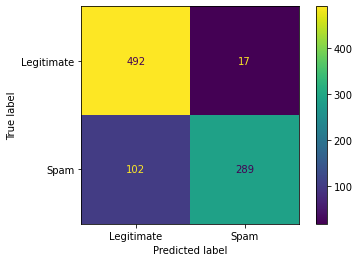

In [39]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(cv, features_test, labels_test, display_labels=["Legitimate", "Spam"])

**2. Selection feature**

In [41]:
feature_folds = StratifiedKFold(n_splits=10, shuffle = True, random_state=99)

In [42]:
selector = fs.RFECV(model, cv=feature_folds, scoring = 'f1', n_jobs=-1)

In [43]:
selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

array([ True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [44]:
print("Feature ranking after RFECV:")
print(selector.ranking_)

Feature ranking after RFECV:
[1 4 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Chosen important features:
['Likes', 'countUrl', 'WhiteSpacenum', 'StopwordRatio', 'WorldDuplicateRatio', 'CountNonAscii', 'CountUpperLetters', 'SimilarityTitle', 'SimilarityDesc', 'LenComment', 'NameLen', 'UrlRatio', 'LexicalRichness', 'LexicalDensity', 'CommentRandomness', 'NameRandomness']


In [46]:
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(2099, 19)
Training subset array shape after the recursive feature elimination:
(2099, 16)
Test subset array shape after the recursive feature elimination:
(900, 16)


In [47]:
cv1 = GridSearchCV(model, param_grid=parameter, scoring='f1', cv=10, return_train_score=True, n_jobs=-1, verbose=1)

In [48]:
cv1.fit(features_train_reduced,labels_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 15, 20, 25, 50, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 40, 50, 100, 200, 500]}],
             return_train_score=True, scoring='f1', verbose=1)

In [49]:
cv1.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 40}

In [50]:
cv1.score(features_train_reduced, labels_train), cv1.score(features_test_reduced, labels_test), cv1.best_score_

(1.0, 0.8328530259365995, 0.8364067051109428)

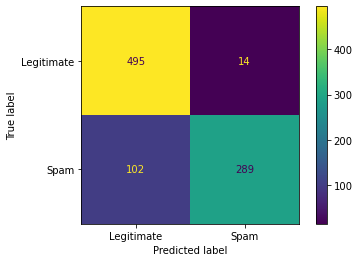

In [52]:
plot_confusion_matrix(cv1, features_test_reduced, labels_test, display_labels=["Legitimate", "Spam"])

---------------------

### **Modeling Text Only**

In [53]:
text_train, text_test, labels_train, labels_test = train_test_split(df['cleanComment'],
                                                                    df["Label"],
                                                                    test_size=0.3,
                                                                    random_state=99)

In [54]:
tfidf_vectorizer = TfidfTransformer()

In [30]:
#tfidf_vectorizer.fit(text_train)
#Xtrain_tfidf = tfidf_vectorizer.transform(text_train.values.tolist())
#Xtest_tfidf = tfidf_vectorizer.transform(text_train.values.tolist())

In [90]:
#model = RandomForestClassifier(random_state=99)

In [55]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(CountVectorizer(),
                         TfidfTransformer(norm=None),
                         RandomForestClassifier())

In [59]:
parameter = {
    'countvectorizer__max_features': (None, 1000, 2000),
    'countvectorizer__ngram_range': ((1, 1), (1, 2)),   # unigrams or bigrams
    #'countvectorizer__stop_words': ('english', None),
    'tfidftransformer__use_idf': (True, False),  # effectively turn on/off tfidf
    'randomforestclassifier__n_estimators': (10, 20, 30, 40, 50, 100, 200, 500)
}

In [60]:
cv2 = GridSearchCV(pipeline, param_grid=parameter, cv=10, scoring='f1', n_jobs=-1, verbose=1)

In [61]:
cv2.fit(text_train, labels_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('tfidftransformer',
                                        TfidfTransformer(norm=None)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': (None, 1000, 2000),
                         'countvectorizer__ngram_range': ((1, 1), (1, 2)),
                         'randomforestclassifier__n_estimators': (10, 20, 30,
                                                                  40, 50, 100,
                                                                  200, 500),
                         'tfidftransformer__use_idf': (True, False)},
             scoring='f1', verbose=1)

In [65]:
cv2.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'countvectorizer', 'tfidftransformer', 'randomforestclassifier', 'countvectorizer__analyzer', 'countvectorizer__binary', 'countvectorizer__decode_error', 'countvectorizer__dtype', 'countvectorizer__encoding', 'countvectorizer__input', 'countvectorizer__lowercase', 'countvectorizer__max_df', 'countvectorizer__max_features', 'countvectorizer__min_df', 'countvectorizer__ngram_range', 'countvectorizer__preprocessor', 'countvectorizer__stop_words', 'countvectorizer__strip_accents', 'countvectorizer__token_pattern', 'countvectorizer__tokenizer', 'countvectorizer__vocabulary', 'tfidftransformer__norm', 'tfidftransformer__smooth_idf', 'tfidftransformer__sublinear_tf', 'tfidftransformer__use_idf', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf

In [62]:
cv2.best_params_

{'countvectorizer__max_features': 2000,
 'countvectorizer__ngram_range': (1, 1),
 'randomforestclassifier__n_estimators': 500,
 'tfidftransformer__use_idf': True}

In [63]:
cv2.score(text_train, labels_train), cv2.score(text_test, labels_test), cv2.best_score_

(0.9978046103183316, 0.9768041237113402, 0.978883165197362)

----------------

### **Modeling FE + Text**

In [136]:
df1 = df.copy()

In [85]:
#train_df, val_df, test_df = np.split(df1.sample(frac=1), [int(.8*len(df1)), int(.9 * len(df1))])
#train_df.to_csv('../Data/Assets/train.csv', index=False)
#val_df.to_csv('../Data/Assets/val.csv', index=False)
#test_df.to_csv('../Data/Assets/test.csv', index=False)

In [86]:
#train = pd.read_csv("../Data/Assets/train.csv")
#val = pd.read_csv("../Data/Assets/val.csv")
#test = pd.read_csv("../Data/Assets/test.csv")

In [87]:
#df2 = pd.concat([train, val])

In [65]:
df1.columns

Index(['Video_Id', 'Tittle', 'Description', 'Name', 'Comment', 'Comment_Id',
       'Time', 'Likes', 'Reply_Count', 'Label', 'cleanTittle', 'cleanComment',
       'cleanDesc', 'LengthSentence', 'CommentLength', 'countUrl',
       'WhiteSpacenum', 'StopwordRatio', 'WorldDuplicateRatio', 'CountEmoji',
       'CountNonAscii', 'CountUpperLetters', 'SimilarityTitle',
       'SimilarityDesc', 'LenComment', 'NameLen', 'UrlRatio',
       'LexicalRichness', 'LexicalDensity', 'CommentRandomness',
       'NameRandomness'],
      dtype='object')

In [96]:
#vectorizer            =  TfidfVectorizer()
#train_tf_idf_features =  vectorizer.fit_transform(df2["cleanComment"]).toarray()
#test_tf_idf_features  =  vectorizer.fit_transform(test["cleanComment"]).toarray()

# Converting above list to DataFrame
#train_tf_idf          = pd.DataFrame(train_tf_idf_features)
#test_tf_idf           = pd.DataFrame(test_tf_idf_features)

# Saparating train and test labels from all features
#train_y = df2["Label"]
#test_y = test["Label"]

**1. Using TF-IDF Vectorizer**

In [67]:
data = ['Likes', 'Reply_Count','cleanComment','LengthSentence', 'CommentLength', 'countUrl',
       'WhiteSpacenum', 'StopwordRatio', 'WorldDuplicateRatio', 'CountEmoji','CountNonAscii', 'CountUpperLetters', 
       'SimilarityTitle','SimilarityDesc', 'LenComment', 'NameLen', 'UrlRatio','LexicalRichness', 'LexicalDensity', 
       'CommentRandomness','NameRandomness']

In [68]:
X_train, X_test, labels_train, labels_test = train_test_split(df1[data],
                                                              df1["Label"],
                                                              test_size=0.3,
                                                              random_state=99)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(2099, 21)
(900, 21)
(2099,)
(900,)


In [127]:
vectorizer            =  TfidfVectorizer()
train_tf_idf_features =  vectorizer.fit_transform(X_train["cleanComment"])
test_tf_idf_features  =  vectorizer.fit_transform(X_test["cleanComment"])
#test_tf_idf_features  =  vectorizer.fit_transform(test["cleanComment"]).toarray()

# Converting above list to DataFrame

In [102]:
from scipy.sparse import csr_matrix

In [103]:
feats = np.array(X_train[feature], dtype=float)
feats.shape
feats = csr_matrix(feats)

In [128]:
feats_test = np.array(X_test[feature], dtype=float)
feats_test.shape
feats_test = csr_matrix(feats_test)

In [118]:
train_tf_idf_features.shape

(2099, 5711)

In [117]:
feats.shape

(2099, 19)

In [119]:
X_train_all = scipy.sparse.hstack((feats, train_tf_idf_features))

In [129]:
X_test_all = scipy.sparse.hstack((feats_test, test_tf_idf_features))

In [122]:
print(train_tf_idf_features.shape)
print(feats.shape)
print(X_train_all.shape)

(2099, 5711)
(2099, 19)
(2099, 5730)


In [130]:
print(test_tf_idf_features.shape)
print(feats_test.shape)
print(X_test_all.shape)

(900, 3060)
(900, 19)
(900, 3079)


In [123]:
parameter = [{
              'n_estimators':[10, 20, 30, 40, 50, 100, 200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, 15, 20, 25, 50, None],
              'class_weight': ['balanced', "balanced_subsample"]
            }]

Scoring Using F1 Score

In [124]:
cv3 = GridSearchCV(model, param_grid=parameter, scoring='f1', cv=10, return_train_score=True, n_jobs=-1, verbose=1)

In [125]:
cv3.fit(X_train_all, labels_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 15, 20, 25, 50, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 40, 50, 100, 200, 500]}],
             return_train_score=True, scoring='f1', verbose=1)

In [132]:
cv3.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500}

In [135]:
cv3.score(X_train_all, labels_train), cv3.score(X_test_all, labels_test), cv3.best_score_

ValueError: X has 3079 features, but RandomForestClassifier is expecting 5730 features as input.

In [137]:
vectorizer = TfidfVectorizer()
tf_idf_features = vectorizer.fit_transform(df1["cleanComment"])

In [138]:
feats = np.array(df1[feature], dtype=float)
feats.shape
feats = csr_matrix(feats)

In [139]:
X_all = scipy.sparse.hstack((feats, tf_idf_features))

In [146]:
label = df1["Label"].values
type(label)

numpy.ndarray

In [147]:
X_train, X_test, labels_train, labels_test = train_test_split(X_all,
                                                              label,
                                                              test_size=0.3,
                                                              random_state=99)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(2099, 7335)
(900, 7335)
(2099,)
(900,)


In [149]:
cv3 = GridSearchCV(model, param_grid=parameter, scoring='f1', cv=10, return_train_score=True, n_jobs=-1, verbose=1)

In [150]:
cv3.fit(X_train, labels_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [5, 10, 15, 20, 25, 50, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 40, 50, 100, 200, 500]}],
             return_train_score=True, scoring='f1', verbose=1)

In [152]:
cv3.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200}

In [153]:
cv3.score(X_train, labels_train), cv3.score(X_test, labels_test), cv3.best_score_

(1.0, 0.9602122015915119, 0.9665828288014927)

Scoring Using Accuracy

In [116]:
cv4 = GridSearchCV(model, param_grid=parameter, scoring='accuracy', cv=10, return_train_score=True, n_jobs=-1, verbose=1)

In [117]:
cv4.fit(X_train, labels_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=99),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced'],
                          'max_depth': [5, 10, 15, 20, 25],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 50, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [118]:
cv4.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 10}

In [119]:
cv4.score(X_train, labels_train), cv4.score(X_test, labels_test), cv4.best_score_

(0.4737956590788777, 0.44320987654320987, 0.5494596420128335)

**2. Using CountVectorizer**

In [58]:
df2 = df.copy()

In [59]:
df2.shape

(2999, 31)

In [60]:
vectorizer            =  CountVectorizer()
train_cv_features     =  vectorizer.fit_transform(df2["cleanComment"]).toarray()
#test_tf_idf_features  =  vectorizer.fit_transform(test["cleanComment"]).toarray()

# Converting above list to DataFrame
train_cv         = pd.DataFrame(train_cv_features)

# Saparating train and test labels from all features
train_y = df2["Label"]

In [61]:
train_cv.shape

(2999, 7316)

In [63]:
train_cv.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
7311    0
7312    0
7313    0
7314    0
7315    0
Length: 7316, dtype: int64

In [41]:
train_cv.replace(to_replace = np.nan, value = 0)

,0,1,2,3,4,5,6,7,8,9,...,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
feat = df2[feature]

In [65]:
feat.shape

(2999, 19)

In [51]:
parameter = [{
                'n_estimators':[10, 50, 100, 200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [5, 10, 15, 20, 25],
                'class_weight': ['balanced']
}]

In [55]:
X = pd.concat([train, feat], axis=1, join="outer")

In [43]:
train = pd.merge(train_cv, feat, left_index=True, right_index=True)

In [44]:
train.shape

(2998, 7335)

In [56]:
X.shape

(2998, 7354)

In [99]:
train.shape

(2998, 7335)

In [101]:
df2[feature].shape

(2999, 19)

In [102]:
train_y.shape

(2999,)